In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('properties_cleaned - GitHub.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


<Axes: xlabel='price'>

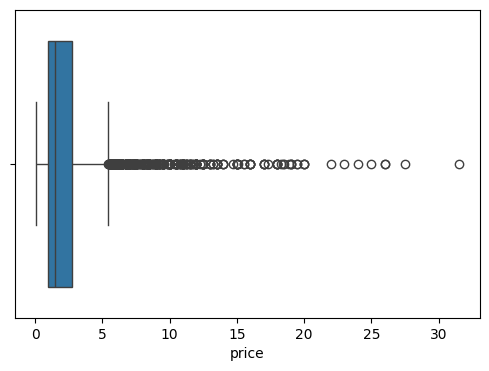

In [8]:
plt.figure(figsize = (6,4))
sns.boxplot(df['price'],orient='h')

In [10]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)

outliers = df[(df['price']>upper) | (df['price']<lower)]

In [11]:
outliers.shape[0]

425

In [13]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

C:\Users\debas\AppData\Local\Temp\ipykernel_7108\540123483.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


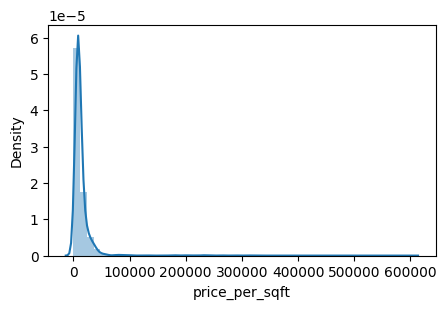

In [17]:
plt.figure(figsize=(5,3))
sns.distplot(df['price_per_sqft'])
plt.show()

<Axes: xlabel='price_per_sqft'>

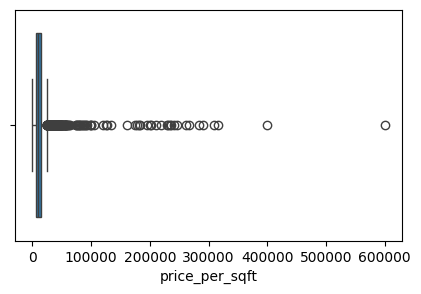

In [19]:
plt.figure(figsize=(5,3))
sns.boxplot(df['price_per_sqft'],orient='h')

In [20]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)

P_P_s_outliers = df[(df['price_per_sqft']>upper) | (df['price_per_sqft']<lower)]
P_P_s_outliers['price_per_sqft'].describe()

count       354.000000
mean      52592.612994
std       61150.458507
min       24489.000000
25%       28208.250000
50%       33368.500000
75%       41982.250000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [25]:
P_P_s_outliers['area'] = P_P_s_outliers['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\debas\AppData\Local\Temp\ipykernel_7108\102150181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P_P_s_outliers['area'] = P_P_s_outliers['area'].apply(lambda x:x*9 if x<1000 else x)


In [26]:
P_P_s_outliers['price_per_sqft'] = round((P_P_s_outliers['price'])*10000000/P_P_s_outliers['area'])

C:\Users\debas\AppData\Local\Temp\ipykernel_7108\2942512233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P_P_s_outliers['price_per_sqft'] = round((P_P_s_outliers['price'])*10000000/P_P_s_outliers['area'])


In [27]:
P_P_s_outliers['price_per_sqft'].describe()

count      354.000000
mean     28855.570621
std      13182.038276
min        514.000000
25%      25546.250000
50%      29788.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [29]:
df.update(P_P_s_outliers)

C:\Users\debas\AppData\Local\Temp\ipykernel_7108\2653482184.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

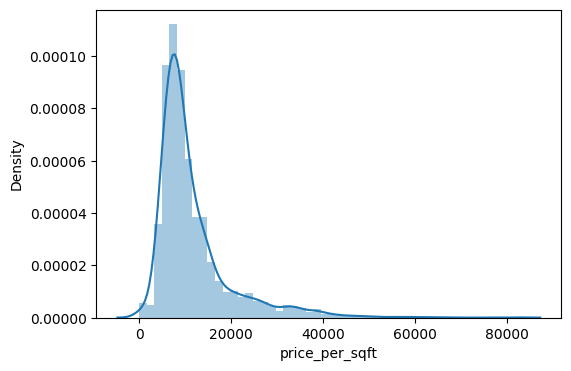

In [31]:
plt.figure(figsize=(6,4))
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

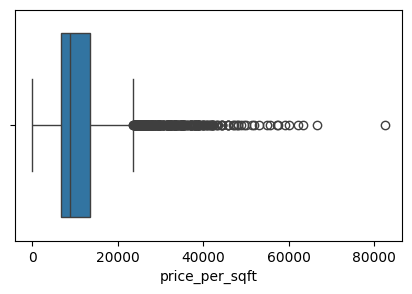

In [32]:
plt.figure(figsize=(5,3))
sns.boxplot(df['price_per_sqft'],orient='h')

In [38]:
df = df[df['price_per_sqft']<=50000]

<Axes: xlabel='price_per_sqft'>

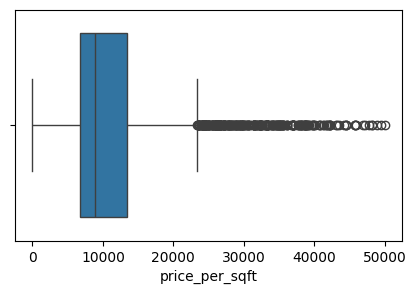

In [39]:
plt.figure(figsize=(5,3))
sns.boxplot(df['price_per_sqft'],orient='h')

C:\Users\debas\AppData\Local\Temp\ipykernel_7108\3060776769.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

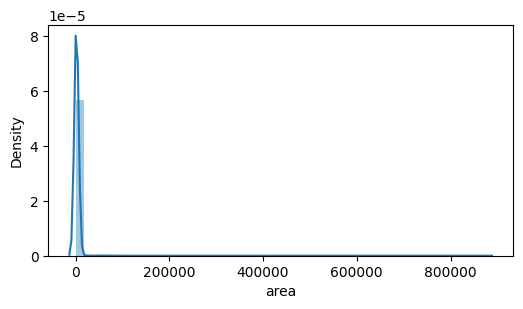

In [41]:
plt.figure(figsize=(6,3))
sns.distplot(df['area'])

<Axes: xlabel='area'>

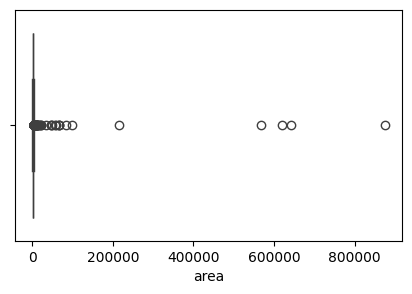

In [43]:
plt.figure(figsize=(5,3))
sns.boxplot(df['area'],orient='h')

In [44]:
df['area'].describe()

count      3647.000000
mean       2967.406636
std       23208.150394
min         145.000000
25%        1272.500000
50%        1758.000000
75%        2355.000000
max      875000.000000
Name: area, dtype: float64

In [47]:
df[df['area']>100000].shape[0]

5

In [49]:
df = df[df['area']<100000]

<Axes: xlabel='area'>

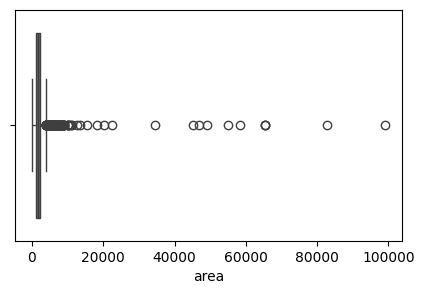

In [50]:
plt.figure(figsize=(5,3))
sns.boxplot(df['area'],orient='h')

In [55]:
df[df['area']>10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
818,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1123,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
1796,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
2356,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
115,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
3649,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [56]:
u_df = df.copy()

In [57]:
u_df.drop(index=[818,1796,1123,2,2356,115,3649,2503,1471],inplace=True)

In [59]:
u_df[u_df['area']>10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
1358,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,1,61
3195,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,1,123
2131,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,1,44
3088,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
3444,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2342,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,0,60


In [70]:
u_df.loc[48,'area'] = 115*9
u_df.loc[300,'area'] = 7250
u_df.loc[2666,'area'] = 5800
u_df.loc[1358,'area'] = 2660
u_df.loc[3195,'area'] = 2850
u_df.loc[2131,'area'] = 1812
u_df.loc[3088,'area'] = 2160
u_df.loc[3444,'area'] = 1175

In [69]:
u_df.loc[3444]

property_type                          flat
society                         godrej icon
sector                           sector 88a
price                                  1.75
price_per_sqft                       1384.0
area                                12645.0
areaWithType           Carpet area: 1175.11
bedRoom                                   3
bathroom                                  3
balcony                                  3+
floorNum                                6.0
facing                                  NaN
agePossession                  New Property
super_built_up_area                     NaN
built_up_area                           NaN
carpet_area                         1175.11
study room                                0
servant room                              0
store room                                0
pooja room                                0
others                                    0
furnishing_type                           0
luxury_score                    

C:\Users\debas\AppData\Local\Temp\ipykernel_7108\4114591742.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(u_df['area'])


<Axes: xlabel='area', ylabel='Density'>

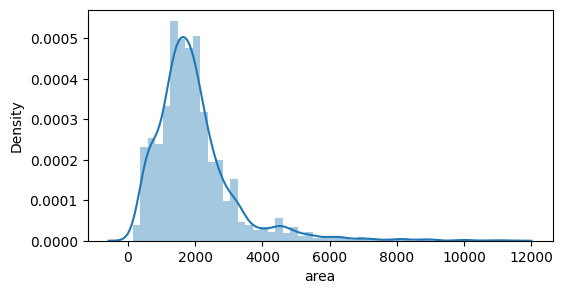

In [71]:
plt.figure(figsize=(6,3))
sns.distplot(u_df['area'])

<Axes: xlabel='area'>

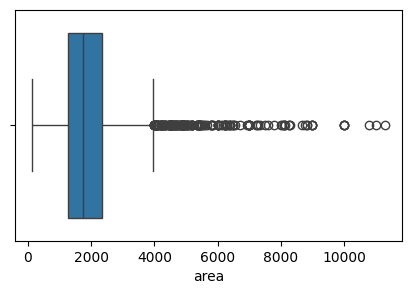

In [73]:
plt.figure(figsize=(5,3))
sns.boxplot(u_df['area'],orient='h')

C:\Users\debas\AppData\Local\Temp\ipykernel_7108\2048914231.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(u_df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

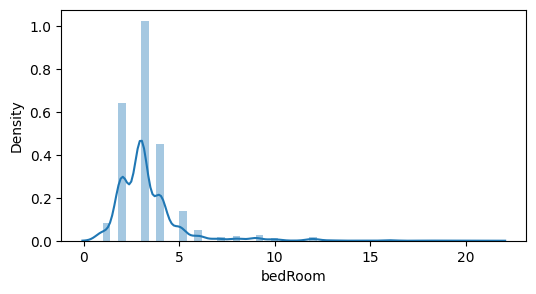

In [75]:
plt.figure(figsize=(6,3))
sns.distplot(u_df['bedRoom'])

<Axes: xlabel='bedRoom'>

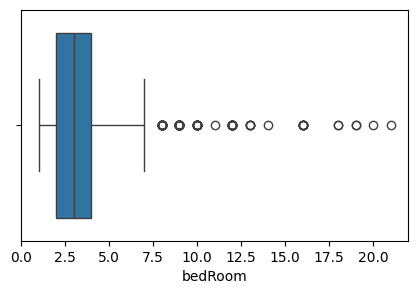

In [76]:
plt.figure(figsize=(5,3))
sns.boxplot(u_df['bedRoom'],orient='h')

In [77]:
u_df['bedRoom'].describe()

count    3633.000000
mean        3.333609
std         1.830035
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [80]:
u_df[u_df['bedRoom']>10].sort_values('bedRoom',ascending=False).shape[0]

45

In [81]:
u_df = u_df[u_df['bedRoom']<=10]

In [82]:
u_df.shape

(3588, 23)

C:\Users\debas\AppData\Local\Temp\ipykernel_7108\2048914231.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(u_df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

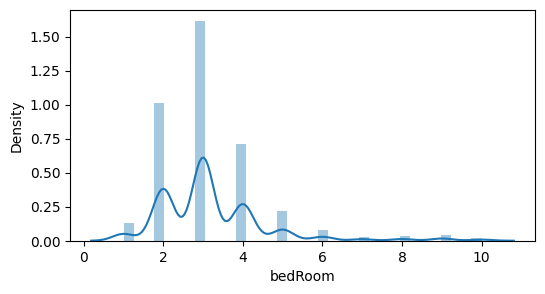

In [83]:
plt.figure(figsize=(6,3))
sns.distplot(u_df['bedRoom'])

<Axes: xlabel='bedRoom'>

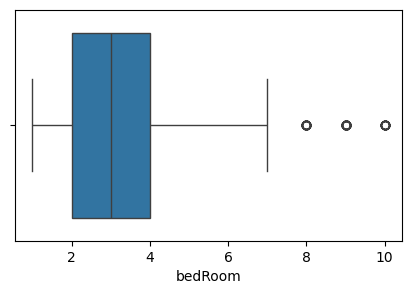

In [84]:
plt.figure(figsize=(5,3))
sns.boxplot(u_df['bedRoom'],orient='h')

C:\Users\debas\AppData\Local\Temp\ipykernel_7108\1493010051.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(u_df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

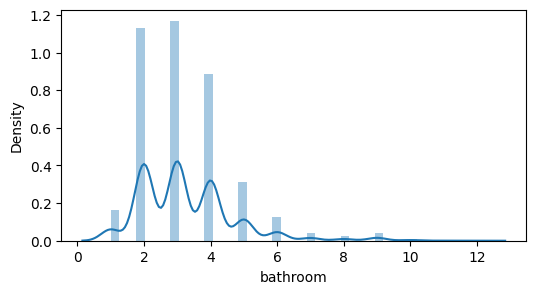

In [86]:
plt.figure(figsize=(6,3))
sns.distplot(u_df['bathroom'])

In [87]:
u_df['bedRoom'].describe()

count    3588.000000
mean        3.203735
std         1.393968
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

In [88]:
u_df[u_df['bathroom']>10].sort_values('bathroom',ascending=False).shape[0]

3

C:\Users\debas\AppData\Local\Temp\ipykernel_7108\3492146988.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(u_df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

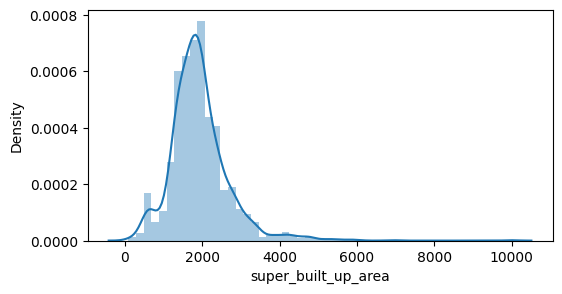

In [89]:
plt.figure(figsize=(6,3))
sns.distplot(u_df['super_built_up_area'])

In [90]:
u_df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

C:\Users\debas\AppData\Local\Temp\ipykernel_7108\1482659665.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(u_df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

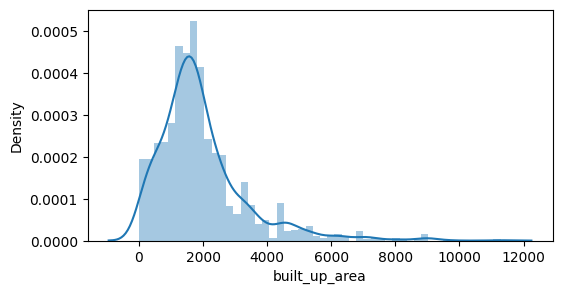

In [91]:
plt.figure(figsize=(6,3))
sns.distplot(u_df['built_up_area'])

In [92]:
u_df[u_df['built_up_area']>10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2834,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


C:\Users\debas\AppData\Local\Temp\ipykernel_7108\1917144095.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(u_df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

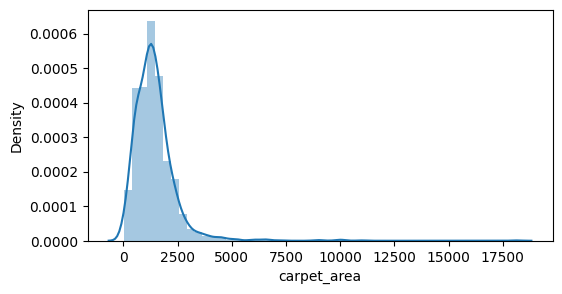

In [93]:
plt.figure(figsize=(6,3))
sns.distplot(u_df['carpet_area'])

<Axes: xlabel='carpet_area'>

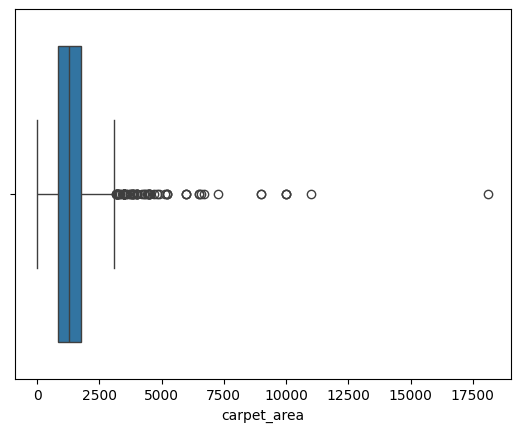

In [95]:
sns.boxplot(x=u_df['carpet_area'])

In [96]:
u_df[u_df['carpet_area']>10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2131,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [97]:
u_df.loc[2131,'carpet_area'] = 1812

In [98]:
u_df[u_df['carpet_area']>10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


C:\Users\debas\AppData\Local\Temp\ipykernel_7108\3416758097.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(u_df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

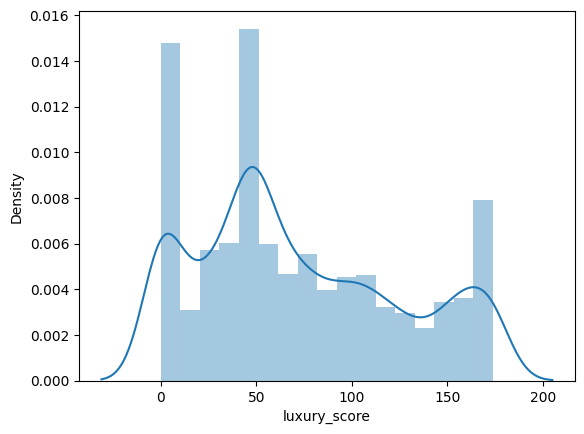

In [99]:
sns.distplot(u_df['luxury_score'])

<Axes: xlabel='luxury_score'>

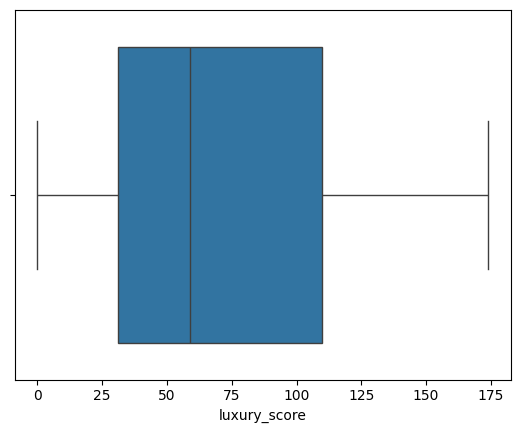

In [100]:
sns.boxplot(u_df['luxury_score'],orient='h')

In [101]:
u_df.shape

(3588, 23)

In [102]:
u_df['price_per_sqft'] = round((u_df['price']*10000000)/u_df['area'])

In [103]:
u_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174
5,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,0,159


C:\Users\debas\AppData\Local\Temp\ipykernel_7108\3984159812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(u_df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

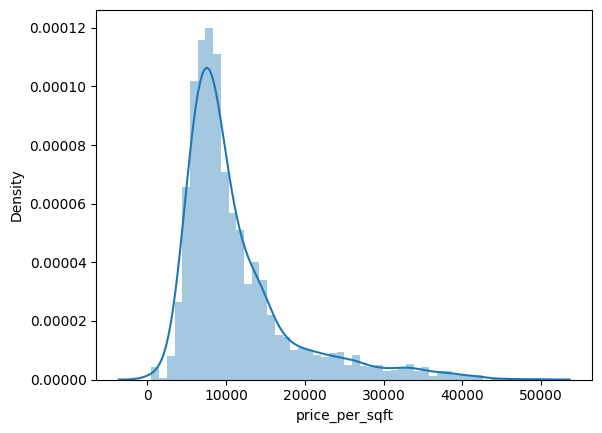

In [104]:
sns.distplot(u_df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

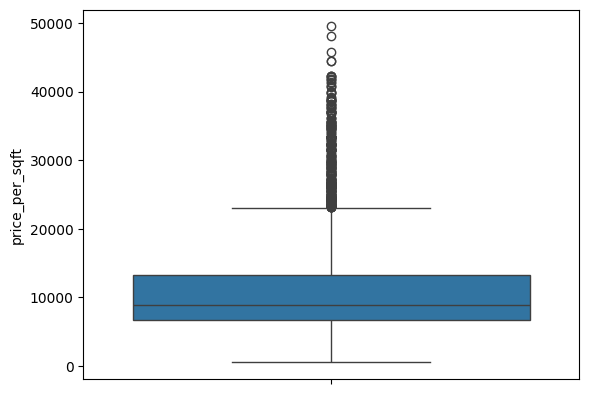

In [105]:
sns.boxplot(u_df['price_per_sqft'])

In [106]:
x = u_df[u_df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

np.float64(198.0)

In [107]:
u_df[(u_df['area']/u_df['bedRoom'])<198]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
9,house,independent,sector 105,1.20,10118.0,1186.0,Plot area 1185.51(110.14 sq.m.),6,2,1,2.0,North-West,Old Property,NaN,1185.51,NaN,0,0,0,0,0,0,9
37,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...,4,4,2,4.0,North,Moderately Old,NaN,NaN,1500.0,0,0,0,0,0,1,7
48,house,ganpati heights apartment,sector 13,1.25,12077.0,1035.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.00,NaN,0,0,0,0,1,0,7
93,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0
99,house,independent,sector 4,1.10,11111.0,990.0,Built Up area: 990 (91.97 sq.m.),6,4,1,2.0,North,Undefined,NaN,990.00,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.00,NaN,0,0,0,0,0,0,0
3686,house,independent,sector 12,0.90,13333.0,675.0,Built Up area: 675 (62.71 sq.m.),4,4,0,2.0,NaN,Undefined,NaN,675.00,NaN,0,0,0,0,0,0,0
3713,house,independent,sector 41,4.25,26235.0,1620.0,Plot area 180(150.5 sq.m.),10,9,3+,4.0,North,Moderately Old,NaN,1620.00,NaN,1,1,0,0,0,1,36
3751,house,independent,sector 21,0.45,8411.0,535.0,Carpet area: 535 (49.7 sq.m.),3,2,1,1.0,NaN,Undefined,NaN,NaN,535.0,0,0,0,0,0,0,0
